In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
epochs = 160

lines = []
files = [
    'trained_models/SSD300/train/MAP_Evaluation_Log.txt',
    'trained_models/SSD300/test/MAP_Evaluation_Log.txt'
]

for f in files:
    file = open(f) 
    l_file = file.readlines()
    l_file = [line.rstrip() for line in l_file]
    file.close()
    lines.append(l_file)

In [3]:
columns = [
    'epoch', 'mAP', 'wolf', 'dog', 'val_mAP', 'val_wolf', 'val_dog'
]
results = pd.DataFrame(columns = columns)
for i in range(epochs):
    data = [{
        'epoch': int(lines[0][i*5].split(':')[1]) +1,
        'mAP': float(lines[0][(i*5)+1].split(':')[1]),
        'wolf': float(lines[0][(i*5)+2].split(':')[1]),
        'dog': float(lines[0][(i*5)+3].split(':')[1]),
        'val_mAP': float(lines[1][(i*5)+1].split(':')[1]),
        'val_wolf': float(lines[1][(i*5)+2].split(':')[1]),
        'val_dog': float(lines[1][(i*5)+3].split(':')[1])
    }]
    df = pd.DataFrame(data)
    results = pd.concat([results, df])
results.to_csv('../results.csv', index=False)

In [4]:
results = pd.read_csv('../results.csv')
results.tail(10)

,epoch,mAP,wolf,dog,val_mAP,val_wolf,val_dog
150,151,0.8930,0.8776,0.9084,0.8344,0.7998,0.8690
151,152,0.8929,0.8773,0.9084,0.8349,0.8005,0.8692
152,153,0.8935,0.8782,0.9087,0.8342,0.8010,0.8674
153,154,0.8941,0.8794,0.9087,0.8347,0.8011,0.8683
154,155,0.8942,0.8797,0.9087,0.8350,0.8017,0.8683
155,156,0.8934,0.8781,0.9087,0.8350,0.8017,0.8683
156,157,0.8943,0.8799,0.9087,0.8364,0.8023,0.8705
157,158,0.8944,0.8800,0.9087,0.8359,0.8027,0.8691
158,159,0.8944,0.8801,0.9087,0.8362,0.8031,0.8693
159,160,0.8946,0.8804,0.9087,0.8361,0.8025,0.8696


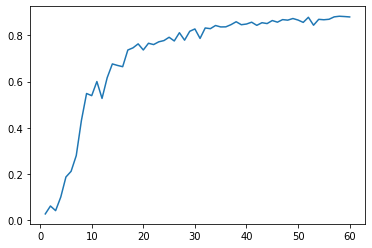

In [9]:
plt.plot(results.epoch.values[:60], results.mAP.values[:60])
plt.show()

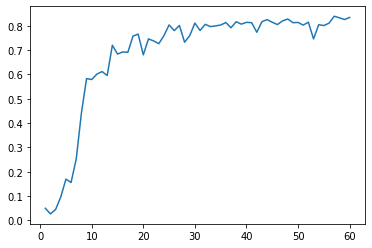

In [10]:
plt.plot(results.epoch.values[:60], results.val_mAP.values[:60])
plt.show()

In [14]:
results[results['epoch']==100]

,epoch,mAP,wolf,dog,val_mAP,val_wolf,val_dog
99,100,0.8877,0.8677,0.9077,0.8243,0.7975,0.8511
